In [1]:
import pandas as pd
import numpy as np

In [31]:
#Import the Air BnB files and cast any date columns to datetime64 data types
listings = pd.read_csv(r'C:\Users\jorda\OneDrive\Documents\Python Data\Air BnB\Airbnb Data\Listings.csv', 
                       low_memory=False, 
                       encoding="ISO-8859-1",
                       parse_dates=['host_since'])

reviews = pd.read_csv(r'C:\Users\jorda\OneDrive\Documents\Python Data\Air BnB\Airbnb Data\Reviews.csv', 
                      low_memory=False, 
                      encoding="ISO-8859-1",
                      parse_dates=['date'])

In [34]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   listing_id   int64         
 1   review_id    int64         
 2   date         datetime64[ns]
 3   reviewer_id  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 164.0 MB


In [38]:
#Create a separate data frame for paris listings
paris_listings = listings.loc[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [45]:
#Check for missing values and calculate the min, max, and average for number fields
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [46]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [52]:
#Create a table that groups Paris listings by neighbourhood and calculates the mean price (sorted low to high)
grouped_by_neighbourhood = paris_listings.groupby('neighbourhood')[['price']].mean().sort_values(by='price')

grouped_by_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [58]:
#Create a table filtering down the most expensive neighbourhood, group by 'accommodations', and add the mean price 
#for each value of 'accommodates'. Sort low to high

paris_listings_accommodates = (paris_listings.loc[paris_listings['neighbourhood'] == 'Elysee']
                               .groupby('accommodates')[['price']]
                               .mean()
                               .sort_values(by='price'))

paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [62]:
#Create a table called paris_listings_over_time grouped by the 'host_since' year, and calculate the average price and count
#of rows representing the new hosts

paris_listings_over_time = (paris_listings.set_index('host_since')
                            .resample('Y')
                            .agg({'neighbourhood': 'count', 'price': 'mean'})
                           )

paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


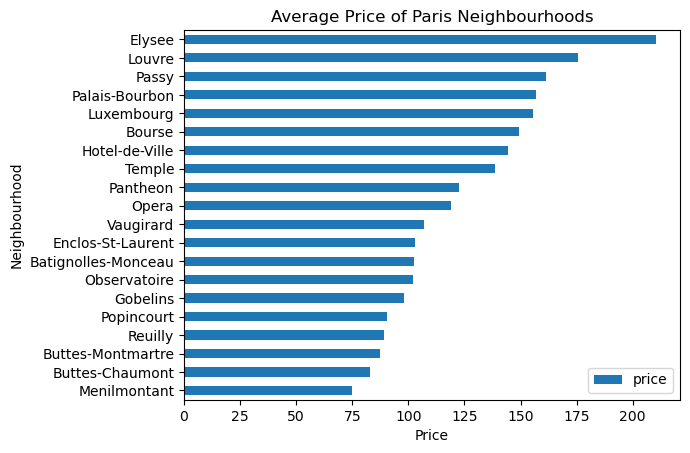

In [70]:
#Create a horizontal bar chart that averages price by neighbourhood in Paris, and make sure to add a title and axis labels
grouped_by_neighbourhood.plot.barh(
    title='Average Price of Paris Neighbourhoods', 
    xlabel='Price', 
    ylabel='Neighbourhood');

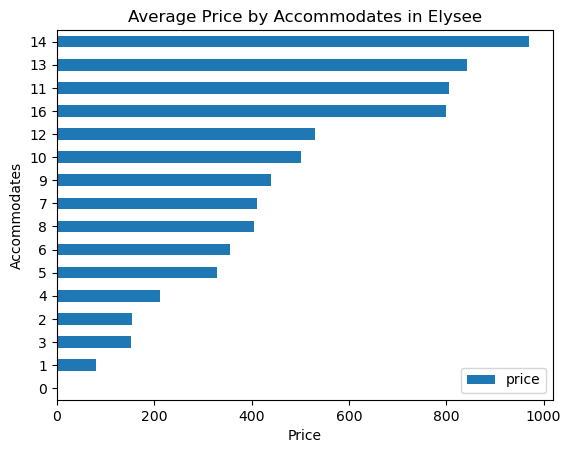

In [76]:
#Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, 
#and make sure to add a title and change axis labels as needed

paris_listings_accommodates.plot.barh(
    title='Average Price by Accommodates in Elysee',
    xlabel = 'Price',
    ylabel='Accommodates');

Text(0.5, 1.0, 'The Effect of 2015 Regulations on New Hosts')

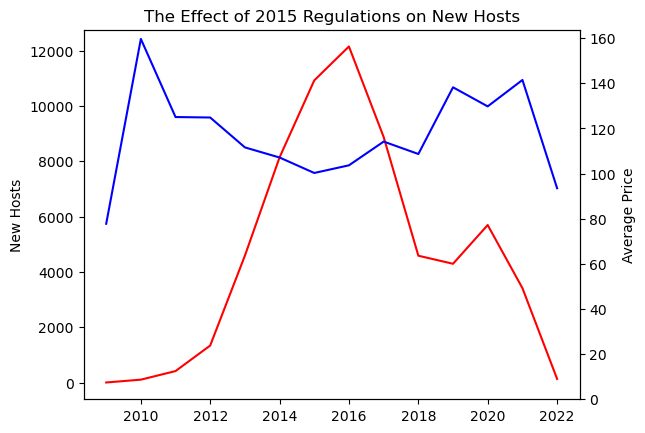

In [88]:
#Create two line charts: one showing the count of new hosts over time, and one showing average price. 
#Set the y-axis limit to 0, add a title, and change axis labels as needed

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = 'New Hosts',
    c='red'
)

ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = 'Average Price',
    c='blue'
)

ax2.set_ylim(0)

ax2.set_ylabel('Average Price')

ax.set_title('The Effect of 2015 Regulations on New Hosts')

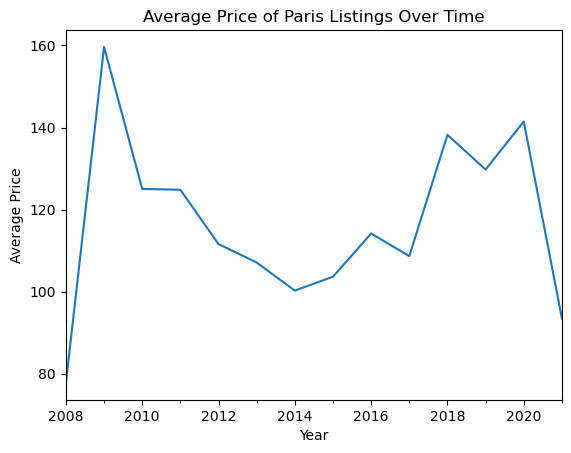

In [84]:
paris_listings_over_time['price'].plot(
    title='Average Price of Paris Listings Over Time',
    xlabel = 'Year',
    ylabel='Average Price');

The number of new hosts increases as the average price decreases, and vice versa